# Human Activity Recognition Using Smartphones Data Set

## 1. Usecase

We'll use the "Human Activity Recognition Using Smartphones Data Set"
[https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones]

This dataset was built thanks to experiments carried out with a group of 30 volunteers within an age bracket of 19-48 years.

Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist.

The aim is to predict the activity performed from the signals measured by the smartphone sensors (accelerometer and gyroscope) 

## 2. Dataset ETL (Extract Transform Load)

In [1]:
import pandas as pd

# First we read features names, which will be used as column names in our data frames
df_features = pd.read_csv('data/features.txt',delim_whitespace=True, header=None)
colnames = df_features.iloc[:,1].values

# Column names contain duplicates ("e.g. : fBodyAccJerk-bandsEnergy()-1,8")
# we fix this by prefixing column names with their indices
colnames_fixed = []
nbcol = len(colnames)
for i in range(0,nbcol):
        colnames_fixed.append(str(i)+"-"+colnames[i])

#  Read data files
X_train = pd.read_csv('data/train/X_train.txt',delim_whitespace=True,names=colnames_fixed)
y_train = pd.read_csv('data/train/y_train.txt',delim_whitespace=True,header=None)

X_test = pd.read_csv('data/test/X_test.txt',delim_whitespace=True,names=colnames_fixed)
y_test = pd.read_csv('data/test/y_test.txt',delim_whitespace=True,header=None)


print("Summary of the X (input) variables in training dataset:")
print(X_train.info())
print("------------------------------------------------------")
print("Summary of the X (input) variables in testing dataset:")
print(X_test.info())

Summary of the X (input) variables in training dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0-tBodyAcc-mean()-X to 560-angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None
------------------------------------------------------
Summary of the X (input) variables in testing dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 561 entries, 0-tBodyAcc-mean()-X to 560-angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 12.6 MB
None


## 3. Data quality assessment

### 3.1 Missing values

In [2]:
X_train.isnull().sum()

0-tBodyAcc-mean()-X                         0
1-tBodyAcc-mean()-Y                         0
2-tBodyAcc-mean()-Z                         0
3-tBodyAcc-std()-X                          0
4-tBodyAcc-std()-Y                          0
                                           ..
556-angle(tBodyGyroMean,gravityMean)        0
557-angle(tBodyGyroJerkMean,gravityMean)    0
558-angle(X,gravityMean)                    0
559-angle(Y,gravityMean)                    0
560-angle(Z,gravityMean)                    0
Length: 561, dtype: int64

Apparently the dataset has no missing value.
We will confirm this by calculating the max number of NULL values 
in all columns (both in the training and in the testing data subsets) :

In [3]:
max_na_train = max(X_train.isnull().sum())
max_na_test = max(X_test.isnull().sum())
print("Missing values in training data : {}".format(max_na_train))
print("Missing values in testing data : {}".format(max_na_test))

Missing values in training data : 0
Missing values in testing data : 0


### 3.2 Invalid values

According to the datasets description each feature is scaled and normalized
so that its values should be in range [-1,1] :

In [4]:
X_train.describe().transpose()

count      mean       std  \
0-tBodyAcc-mean()-X                       7352.0  0.274488  0.070261   
1-tBodyAcc-mean()-Y                       7352.0 -0.017695  0.040811   
2-tBodyAcc-mean()-Z                       7352.0 -0.109141  0.056635   
3-tBodyAcc-std()-X                        7352.0 -0.605438  0.448734   
4-tBodyAcc-std()-Y                        7352.0 -0.510938  0.502645   
...                                          ...       ...       ...   
556-angle(tBodyGyroMean,gravityMean)      7352.0  0.008726  0.608303   
557-angle(tBodyGyroJerkMean,gravityMean)  7352.0 -0.005981  0.477975   
558-angle(X,gravityMean)                  7352.0 -0.489547  0.511807   
559-angle(Y,gravityMean)                  7352.0  0.058593  0.297480   
560-angle(Z,gravityMean)                  7352.0 -0.056515  0.279122   

                                               min       25%       50%  \
0-tBodyAcc-mean()-X                      -1.000000  0.262975  0.277193   
1-tBodyAcc-mean()-Y                      -1.000000 -0.024863 -0.017219   
2-tBodyAcc-mean()-Z                      -1.000000 -0.120993 -0.108676   
3-tBodyAcc-std()-X                       -1.000000 -0.992754 -0.946196   
4-tBodyAcc-std()-Y                       -0.999873 -0.978129 -0.851897   
...                                            ...       ...       ...   
556-angle(tBodyGyroMean,gravityMean)     -1.000000 -0.482273  0.008735   
557-angle(tBodyGyroJerkMean,gravityMean) -1.000000 -0.376341 -0.000368   
558-angle(X,gravityMean)                 -1.000000 -0.812065 -0.709417   
559-angle(Y,gravityMean)                 -1.000000 -0.017885  0.182071   
560-angle(Z,gravityMean)                 -1.000000 -0.143414  0.003181   

                                               75%       max  
0-tBodyAcc-mean()-X                       0.288461  1.000000  
1-tBodyAcc-mean()-Y                      -0.010783  1.000000  
2-tBodyAcc-mean()-Z                      -0.097794  1.000000  
3-tBodyAcc-std()-X                       -0.242813  1.000000  
4-tBodyAcc-std()-Y                       -0.034231  0.916238  
...                                            ...       ...  
556-angle(tBodyGyroMean,gravityMean)      0.506187  0.998702  
557-angle(tBodyGyroJerkMean,gravityMean)  0.359368  0.996078  
558-angle(X,gravityMean)                 -0.509079  1.000000  
559-angle(Y,gravityMean)                  0.248353  0.478157  
560-angle(Z,gravityMean)                  0.107659  1.000000  

[561 rows x 8 columns]

We can check that all values are really in range [-1,1] both in training and testing datasets as follows :

In [5]:
train_min= min(X_train.min())
train_max= max(X_train.max())
test_min= min(X_test.min())
test_max= max(X_test.max())
print(f" Training dataset - values are in range [{train_min},{train_max}]")
print(f" Testing dataset - values are in range [{test_min},{test_max}]")


 Training dataset - values are in range [-1.0,1.0]
 Testing dataset - values are in range [-1.0,1.0]


### 3.3 Outliers

We can show that there are outliers in the training dataset
by calculating the IQR (Inter Quartile Range) for each feature variable :

In [6]:
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1
((X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))).sum()


0-tBodyAcc-mean()-X                         1795
1-tBodyAcc-mean()-Y                         1122
2-tBodyAcc-mean()-Z                         1180
3-tBodyAcc-std()-X                             2
4-tBodyAcc-std()-Y                             0
                                            ... 
556-angle(tBodyGyroMean,gravityMean)           0
557-angle(tBodyGyroJerkMean,gravityMean)       0
558-angle(X,gravityMean)                    1437
559-angle(Y,gravityMean)                     776
560-angle(Z,gravityMean)                     705
Length: 561, dtype: int64

Although outliers display "extreme" values these values are not necessarily invalid. So we'll keep them as they are for now.

## 4. Data exploration

To study the correlation between columns we will apply a PCA decomposition :

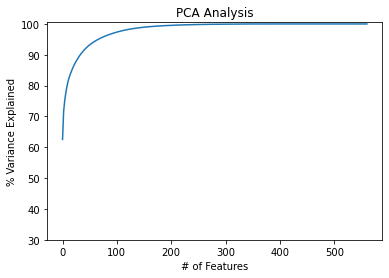

In [7]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca=PCA()
pca.fit(X_train)
variance = pca.explained_variance_ratio_ #calculate variance ratios

cumul_variance=np.cumsum(np.round(variance, decimals=5)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(cumul_variance)

The plot shows that the 50 first (out of 561)  principal components should be enough to keep about 95% of the variance.

## 5. Data  visualization

Here we show that the distribution of the outcome values is quite balanced
both in training and testing dataset.

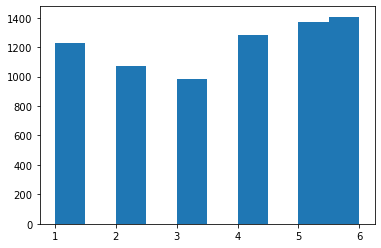

In [8]:
import matplotlib.pyplot as plt

# Training data
plt.hist(y_train[0])
plt.show()


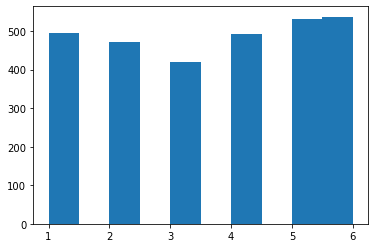

In [9]:
# Testing data
plt.hist(y_test[0])
plt.show()

 NB: 1 = WALKING, 2 = WALKING_UPSTAIRS, 3 = WALKING_DOWNSTAIRS, 4 = SITTING, 5 = STANDING, 6 = LAYING

## 6. Features Engineering

### 6.1 Dimensionality reduction of X with PCA 

In order to remove noise and redundancy in data we'll keep only the 300 first components built from PCA (see section 4.)

In [10]:
pca=PCA(n_components=300)

# IMPORTANT : values are already scaled and centered so we don't need to pre-process them: we can fit PCA directly.
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

### 6.2 One-hot encoding of y


To build a neural network model with Keras, target variable must be one-hot encoded :

In [11]:
import tensorflow as tf

# keras to_categorical method requires values starting from 0. Hence the "-1"
y_train_cat= tf.keras.utils.to_categorical(y_train-1)
y_test_cat=  tf.keras.utils.to_categorical(y_test-1)

## 7. Model performance indicator

In section 5. Data visualization, we showed that target class values were **balanced**. So we can use "accuracy" as a model performance indicator. Accuracy is both simple to calculate and very easy to interpret.

## 8. Traditional Machine Learning Algorithm (linear SVM)

In [12]:
# Training a linear SVM classifier 

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# we'll use grid-search cross-validation to tune the hyper-parameters 

param_grid = {'C': [0.1, 1, 10,100],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['linear']}  


grid = GridSearchCV(SVC(), param_grid, scoring='accuracy', refit = True, verbose = 1) 
  
# fitting the model for grid search 
grid.fit(X_train_pca, y_train[0]) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


y_pred = grid.predict(X_test_pca) 
  
print("Accuracy :",accuracy_score(y_test[0], y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.6min finished


{'C': 1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=1, gamma=1, kernel='linear')
Accuracy : 0.9636918900576857


## 9. Deep Learning Algorithm (MLP)

In [46]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential([
   Dense(500, activation='relu', input_shape=(300,)),
   Dropout(rate=0.4),
   Dense(250, activation='relu'),
   Dropout(rate=0.2),
   Dense(125, activation='relu'),
   Dropout(rate=0.1), 
   Dense(6, activation='softmax')
])

model.compile(
   optimizer='Adam',
   loss='categorical_crossentropy',
   metrics=['accuracy']
)

# make the results reproducible
from numpy.random import seed
seed(1)
import tensorflow 
tensorflow.random.set_seed(2)

result=model.fit(
   x=X_train_pca,
   y=y_train_cat,
   epochs=27,
   batch_size=64,
   shuffle=True,
   validation_data=(X_test_pca, y_test_cat),
   verbose=0
)


**Performance evaluation:**

In [47]:
model_eval = model.evaluate(X_test_pca, y_test_cat)
model_eval



93/93 [==============================] - 0s 2ms/step - loss: 0.2174 - accuracy: 0.9742


[0.21735869348049164, 0.9742110371589661]

**Performance visualization:**

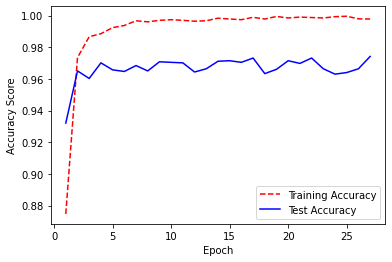

In [48]:
# Get training and test accuracy histories
training_accuracy = result.history['accuracy']
test_accuracy = result.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize accuracy history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.show();